## Import Dataset

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import datetime 
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [33]:
data = pd.read_csv('creditcard.csv')

## Standardize Variables

In [34]:
# Standardize Amount Column 
data["Standardized_Amount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Standardized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Check Skewness

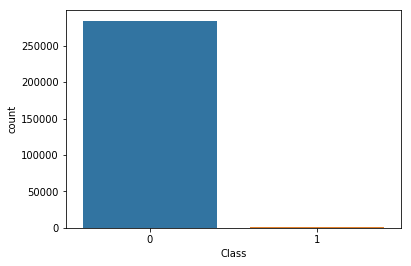

In [4]:
# Check Class Distribution
sns.countplot("Class",data=data)

## Data Modeling

In [43]:
# Sampling with different Proportion
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)

def undersample(normal_indices,fraud_indices,times):
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*len(data[data["Class"]==1])),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data))
    return(undersample_data)

In [36]:
# Train & Test Split
def data_prepration(x): 
    x_features = x.ix[:,x.columns != "Class"]
    x_labels = x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [54]:
# Modeling & Precision-Recall Check Accuracy
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print()
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))
    print("TP",cnf_matrix[1,1,]) 
    print("TN",cnf_matrix[0,0]) 
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("Classification Report")
    print()
    print(classification_report(labels_test,pred))

### Logistic Regression



----------------------------------------------
the fraud transacation proportion is : 0.5

the recall for this model is : 0.9115646258503401
TP 134
TN 143
FP 6
FN 13


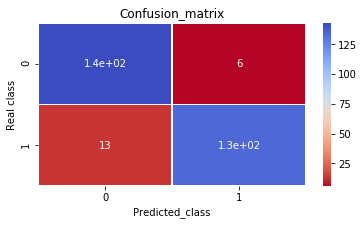

Classification Report

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       149
          1       0.96      0.91      0.93       147

avg / total       0.94      0.94      0.94       296



----------------------------------------------
the fraud transacation proportion is : 0.3333333333333333

the recall for this model is : 0.88
TP 132
TN 292
FP 1
FN 18


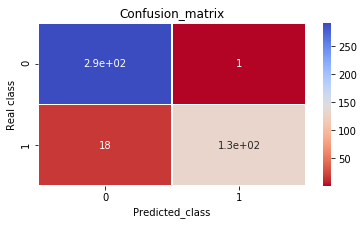

Classification Report

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       293
          1       0.99      0.88      0.93       150

avg / total       0.96      0.96      0.96       443



----------------------------------------------
the fraud transacation proportion is : 0.25

the recall for this model is : 0.8827586206896552
TP 128
TN 441
FP 5
FN 17


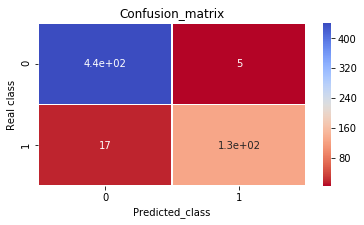

Classification Report

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       446
          1       0.96      0.88      0.92       145

avg / total       0.96      0.96      0.96       591



In [57]:
# Test with different sampling proportions with Logistic Regression
for i in range(1,4):
    print()
    print("\n----------------------------------------------")
    data_new = undersample(normal_indices,fraud_indices,i)
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(data_new)
    clf=LogisticRegression()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    

### SVM



----------------------------------------------
the fraud transacation proportion is : 0.5

the recall for this model is : 0.8768115942028986
TP 121
TN 146
FP 12
FN 17


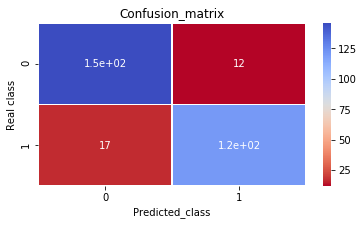

Classification Report

             precision    recall  f1-score   support

          0       0.90      0.92      0.91       158
          1       0.91      0.88      0.89       138

avg / total       0.90      0.90      0.90       296



----------------------------------------------
the fraud transacation proportion is : 0.3333333333333333

the recall for this model is : 0.8888888888888888
TP 128
TN 287
FP 12
FN 16


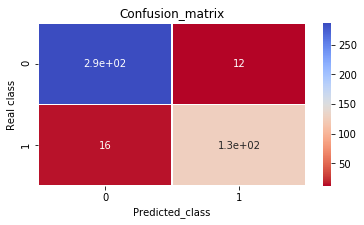

Classification Report

             precision    recall  f1-score   support

          0       0.95      0.96      0.95       299
          1       0.91      0.89      0.90       144

avg / total       0.94      0.94      0.94       443



----------------------------------------------
the fraud transacation proportion is : 0.25

the recall for this model is : 0.8902439024390244
TP 146
TN 422
FP 5
FN 18


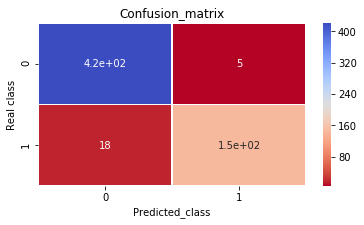

Classification Report

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       427
          1       0.97      0.89      0.93       164

avg / total       0.96      0.96      0.96       591



In [58]:
# Test with different sampling proportions with SVM
for i in range(1,4):
    print()
    print("\n----------------------------------------------")
    data_new = undersample(normal_indices,fraud_indices,i)
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(data_new)
    clf= SVC()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    

### Random Forest



----------------------------------------------
the fraud transacation proportion is : 0.5

the recall for this model is : 0.9387755102040817
TP 138
TN 147
FP 2
FN 9


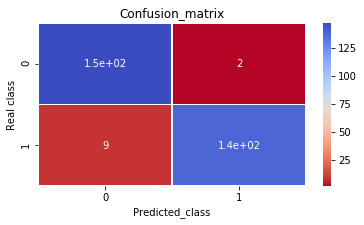

Classification Report

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       149
          1       0.99      0.94      0.96       147

avg / total       0.96      0.96      0.96       296



----------------------------------------------
the fraud transacation proportion is : 0.3333333333333333

the recall for this model is : 0.8807947019867549
TP 133
TN 284
FP 8
FN 18


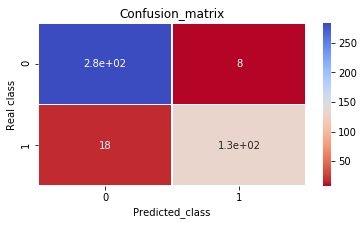

Classification Report

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       292
          1       0.94      0.88      0.91       151

avg / total       0.94      0.94      0.94       443



----------------------------------------------
the fraud transacation proportion is : 0.25

the recall for this model is : 0.8513513513513513
TP 126
TN 441
FP 2
FN 22


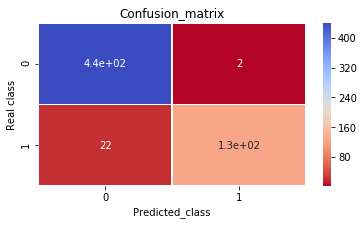

Classification Report

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       443
          1       0.98      0.85      0.91       148

avg / total       0.96      0.96      0.96       591



In [59]:
# Test with different sampling proportions with Random Forest
for i in range(1,4):
    print()
    print("\n----------------------------------------------")
    data_new = undersample(normal_indices,fraud_indices,i)
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(data_new)
    clf= RandomForestClassifier(n_estimators=500)
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    

## Variable Deduction

In [62]:
# VIF variable deduction
vif = pd.Series(clf.feature_importances_,index=undersample_features_train.columns).sort_values(ascending=False)
vif[:10]

V14    0.197085
V10    0.158806
V12    0.108633
V17    0.101201
V11    0.070462
V16    0.064299
V4     0.051008
V3     0.042639
V7     0.030955
V2     0.022611
dtype: float64

In [66]:
# Create new dataset from VIF results
new_data = data[['V14','V10','V12','V17','Class']]
new_data.head()

,V14,V10,V12,V17,Class
0,-0.311169,0.090794,-0.617801,0.207971,0
1,-0.143772,-0.166974,1.065235,-0.114805,0
2,-0.165946,0.207643,0.066084,1.109969,0
3,-0.287924,-0.054952,0.178228,-0.684093,0
4,-1.119670,0.753074,0.538196,-0.237033,0


## Random Forest Modeling



----------------------------------------------
the fraud transacation proportion is : 0.5

the recall for this model is : 0.9032258064516129
TP 140
TN 140
FP 1
FN 15


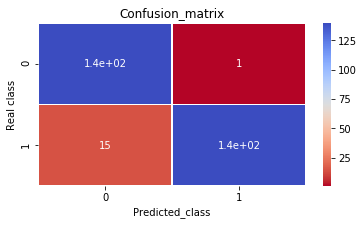

Classification Report

             precision    recall  f1-score   support

          0       0.90      0.99      0.95       141
          1       0.99      0.90      0.95       155

avg / total       0.95      0.95      0.95       296



----------------------------------------------
the fraud transacation proportion is : 0.3333333333333333

the recall for this model is : 0.9090909090909091
TP 140
TN 288
FP 1
FN 14


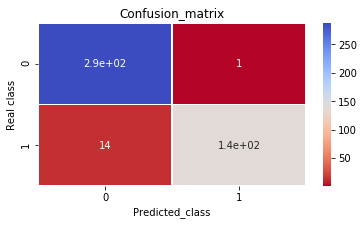

Classification Report

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       289
          1       0.99      0.91      0.95       154

avg / total       0.97      0.97      0.97       443



----------------------------------------------
the fraud transacation proportion is : 0.25

the recall for this model is : 0.8414634146341463
TP 138
TN 424
FP 3
FN 26


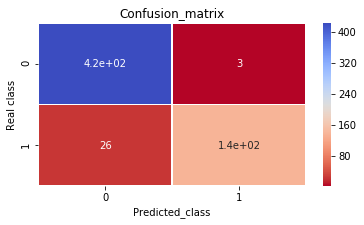

Classification Report

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       427
          1       0.98      0.84      0.90       164

avg / total       0.95      0.95      0.95       591



In [69]:
# Test with different sampling proportions with Random Forest
fraud_new_indices= np.array(new_data[new_data.Class==1].index)
normal_new_indices = np.array(new_data[new_data.Class==0].index)

for i in range(1,4):
    print()
    print("\n----------------------------------------------")
    new_data_new = undersample(normal_new_indices,fraud_new_indices,i)
    new_undersample_features_train,new_undersample_features_test,new_undersample_labels_train,new_undersample_labels_test=data_prepration(new_data_new)
    clf= RandomForestClassifier(n_estimators=500)
    model(clf,new_undersample_features_train,new_undersample_features_test,new_undersample_labels_train,new_undersample_labels_test)
    

#### The best model is random forest with variable deduction and fraud transacation proportion as 0.33 